In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_regression 
from sklearn.metrics import r2_score

In [20]:
X,y= make_regression(n_samples=300, n_features=1, noise=30, random_state=42)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(lr.coef_,lr.intercept_)

[27.01949437] 0.6129080011220791


In [23]:
r2_score(y_test, y_pred)

0.5163169999343482

In [24]:
r=Ridge(alpha=1.0)
r.fit(X_train, y_train)
y_pred_ridge = r.predict(X_test)
print(r.coef_, r.intercept_)


[26.89924327] 0.6137125655973872


In [25]:
r2_score(y_test, y_pred_ridge)

0.5158091186591125

In [26]:
rr=Ridge(alpha=100.0)
rr.fit(X_train, y_train)
y_pred_ridge2 = rr.predict(X_test)
print(rr.coef_, rr.intercept_)

[18.6722165] 0.668757163550615


In [27]:
r2_score(y_test, y_pred_ridge2)

0.44302395334228817

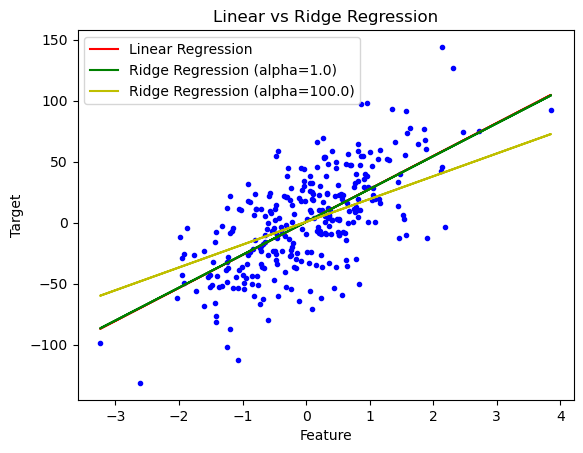

In [28]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X), 'r-', label='Linear Regression')
plt.plot(X, r.predict(X), 'g-', label='Ridge Regression (alpha=1.0)')
plt.plot(X, rr.predict(X), 'y-', label='Ridge Regression (alpha=100.0)')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear vs Ridge Regression')
plt.show()

In [31]:
class ridge_new:
    def __init__(self,alpha=1.0):
        self.alpha=alpha
        self.coef_=None
        self.intercept_=None
    
    def fit(self,X_train,y_train):
        num=0
        den=0
        
        for i in range(X_train.shape[0]):
            num+=((y_train[i]-y_train.mean())*(X_train[i]-X_train.mean()))
            den+=((X_train[i]-X_train.mean())**2)
        
        self.coef_=num/(den+self.alpha)
        self.intercept_=y_train.mean() - self.coef_*X_train.mean()
        print(self.coef_, self.intercept_)

    def predict(self,X_test):
        return self.coef_ * X_test + self.intercept_
        

In [32]:
rd=ridge_new(alpha=5)
rd.fit(X_train, y_train)

[26.42875528] [0.61686046]


In [34]:
y_pred=rd.predict(X_test)
print("Custom Ridge Coefficient:", rd.coef_)

Custom Ridge Coefficient: [26.42875528]


In [36]:
r2= r2_score(y_test, y_pred)
r2

0.5136680605739053